<a href="https://colab.research.google.com/github/priyanka12177/data_projects-ADVDS/blob/Project2/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
# NumPy has support for large, multi-dimensional arrays and matrices, along with 
# a large collection of high-level mathematical functions to operate on these arrays.
# Import matplotlib  to visualize the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Read Zip file from github into a dataframe
#Food_data:Recipes by rating, nutritional content, and categories 

df = pd.read_csv('https://github.com/priyanka12177/AML/raw/Project2/epi_r.csv.zip')


In [3]:
#head function is used to get the first 5 rows which displays the columns and data
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#shape is used to identify the number of rows and columns in data frame
df.shape

(20052, 680)

In [5]:
#checking missing values for all the columns in the dataframe
df.isnull().sum().sort_values( ascending=False)

fat               4183
protein           4162
sodium            4119
calories          4117
title                0
                  ... 
friendsgiving        0
frittata             0
fritter              0
frozen dessert       0
turkey               0
Length: 680, dtype: int64

In [6]:
#removing duplicates from the dataframe using drop_duplicate function
df2 = df.drop_duplicates()

#Identifying the number of rows and columns in the df2 dataframe after removing duplicates
df2.shape

(18251, 680)

In [7]:
#To handle missing values we need to impute the missing values with mean or median which can be done for numerical columns
#For imputation subsetting the data frame of numeric columns
df_numerical = df2[['rating','fat','protein','sodium','calories']]

#Identifying the number of rows and columns in the df_numerical dataframe after classifying the dataframe
df_numerical.shape

(18251, 5)

In [8]:
#subsetting the data frame of categorical columns
df_categorical = df2.loc[:, ~df.columns.isin(['rating','fat','protein','sodium','calories'])]

#Identifying the number of rows and columns in the df_categorical dataframe after classifying the dataframe
print (df_categorical.shape)

#head is used to get the sample data of categorical dataframe
df_categorical.head()

(18251, 675)


,title,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#importing SimpleImputer function from sklearn package
#using  with strategy as  median for imputing
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [10]:
# Performing imputation on df_numerical dataframe using fit and transform
imputer.fit(df_numerical)
X=imputer.transform(df_numerical)

In [11]:
#creating dataframe from array
df3=pd.DataFrame(X,columns=df_numerical.columns,index=df_numerical.index)

#To get the sample data of df3 dataframe
df3.head()

,rating,fat,protein,sodium,calories
0,2.500,7.0,30.0,559.0,426.0
1,4.375,23.0,18.0,1439.0,403.0
2,3.750,7.0,6.0,165.0,165.0
3,5.000,18.0,9.0,304.0,345.0
4,3.125,32.0,20.0,452.0,547.0


In [12]:
#validating for missing values after performing imputation
df3.isnull().sum().sort_values( ascending=False)

rating      0
fat         0
protein     0
sodium      0
calories    0
dtype: int64

In [13]:
#checking the skewness for numeric variables
skewness_data = df3.skew()
skewness = pd.DataFrame({'skew':skewness_data})
skewness.sort_values(by = 'skew', ascending = False).head()

,skew
fat,84.664104
calories,83.375306
sodium,81.219787
protein,62.726723
rating,-1.888103


In [14]:
#If the skew range is between -1 to 1 that the data is good. if not apply some transformation to make the data skewed
#applying cuberoot twice transformation to reduce skewness
for column in ['fat','protein','sodium','calories'] :
        df3[column] = np.cbrt(np.cbrt(df3[column]))

In [15]:
#checking skweness values on calories, protein, fat, sodium attributes
df3.skew().sort_values(ascending = False)

calories    3.288343
sodium      0.156811
rating     -1.888103
protein    -2.225201
fat        -2.472970
dtype: float64

In [16]:
#displaying sample data of df3 dataframe
df3.head()

,rating,fat,protein,sodium,calories
0,2.500,1.241366,1.459233,2.019612,1.959551
1,4.375,1.416782,1.378716,2.243343,1.947504
2,3.750,1.241366,1.220285,1.763547,1.763547
3,5.000,1.378716,1.276518,1.887447,1.914167
4,3.125,1.469734,1.394951,1.972493,2.014748


In [17]:
#perfoming pair-wise Pearson correlation on calories, protein, fat, sodium attributes with respect to rating attribute
#protein has highest correlation with rating compared to other attributes
df3.corr(method='pearson') ['rating'].sort_values( ascending=False)

rating      1.000000
protein     0.198582
fat         0.181537
sodium      0.144370
calories    0.121091
Name: rating, dtype: float64

In [18]:
# we have to scale the data before performing PCA
# StandardScale the data by importing standardscaler packages by performing fit and transform operation

from sklearn.preprocessing import StandardScaler

# also try MinMaxScaler
scaler = StandardScaler()
scaler.fit(df3)

scaled_data = scaler.transform(df3)

scaled_data2 = pd.DataFrame(scaled_data,columns=df3.columns,index=df3.index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8606361d0>,
      dtype=object)

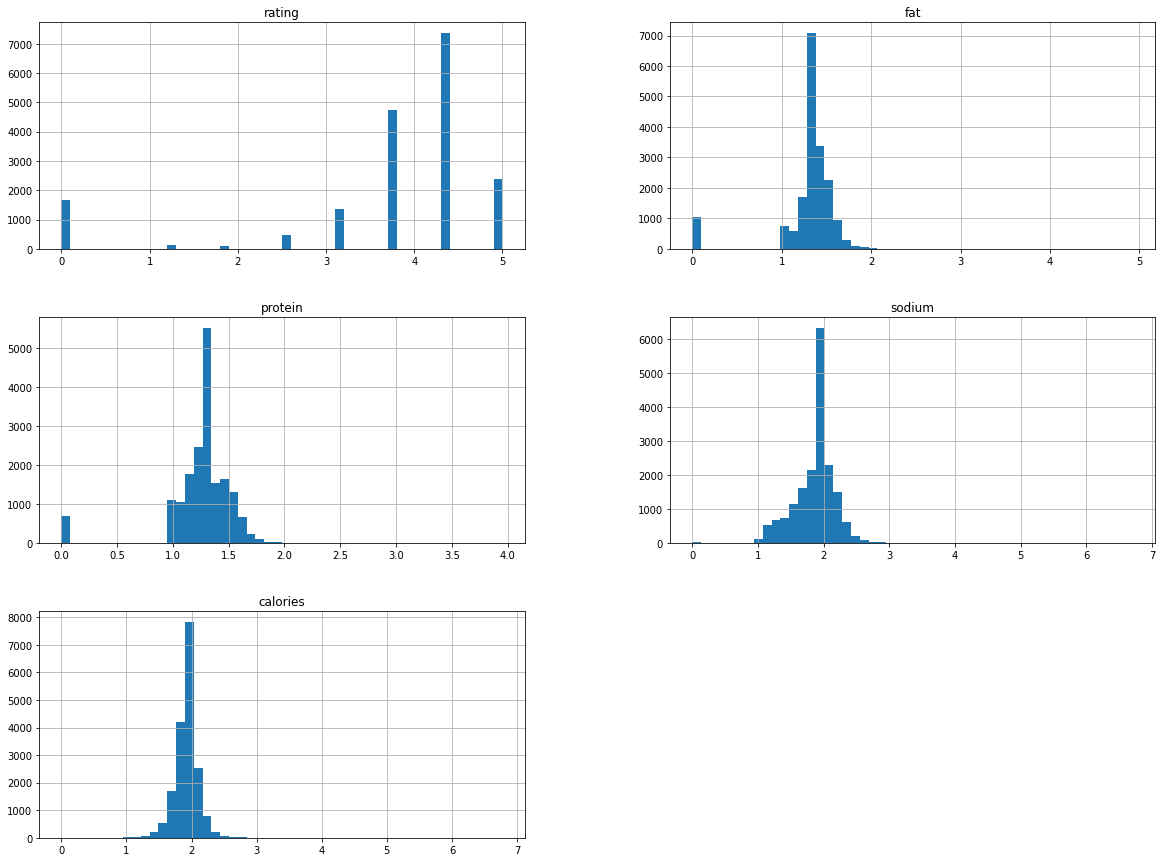

In [19]:
#hisogram of Raw Data before scaling
df3.hist(bins=50, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb85fc42b10>,
      dtype=object)

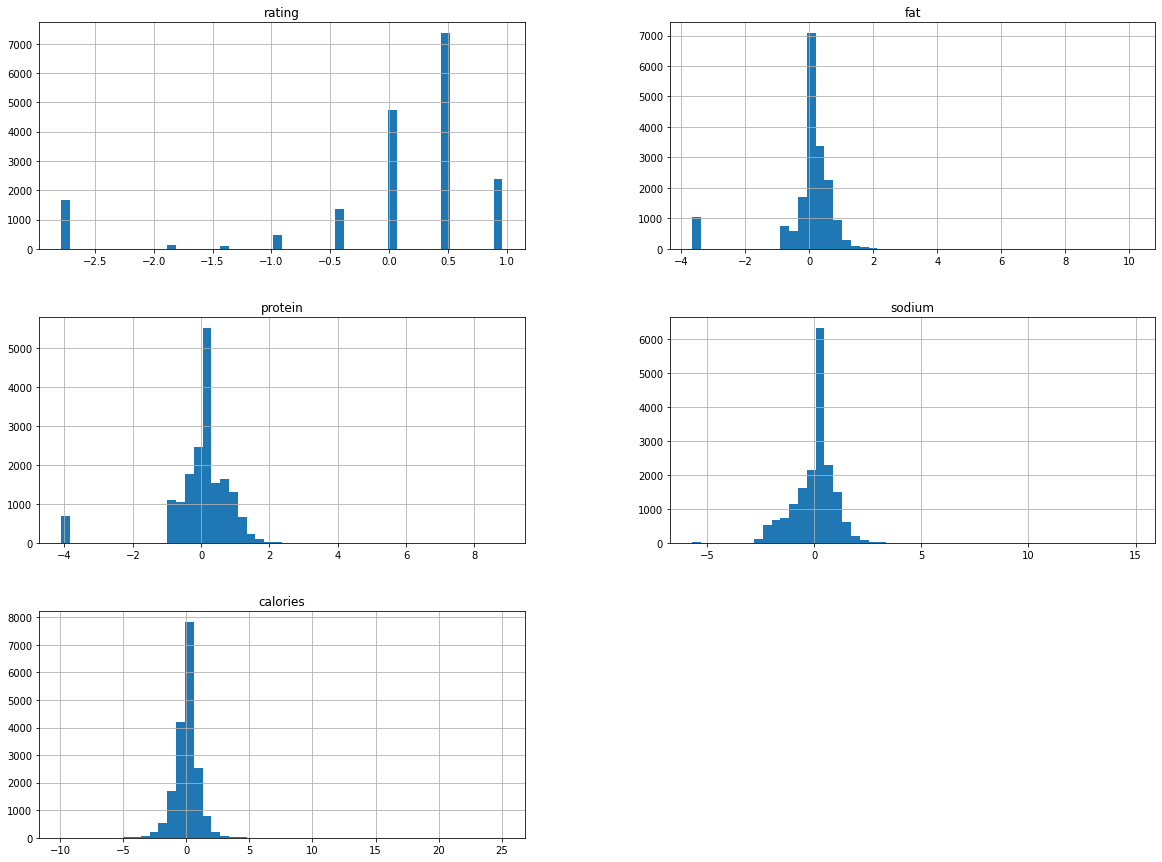

In [20]:
#Histogram of Scaled Data after performing standardization
pd.DataFrame(scaled_data2).hist(bins=50, figsize=(20,15))

In [21]:
# Apply PCA on numerical attributes calories, protein, fat, sodium

from sklearn.decomposition import PCA

# option 2: select all components that explain 95% of variance
pca2 = PCA()
pca2.fit(scaled_data2)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

# transform the data to its top 95% variance principal components
x_pca2 = pca2.transform(scaled_data2)

In [22]:
# Let's examine the PCA results
#first component explains 57% variance

print ('Scaled data shape: ', scaled_data2.shape)
print ('Explained variance for all components: ', pca2.explained_variance_ratio_)
print ('#Components explaining 95% of variance: ', d)

Scaled data shape:  (18251, 5)
Explained variance for all components:  [0.57670367 0.18984688 0.09154224 0.08395033 0.05795688]
#Components explaining 95% of variance:  5


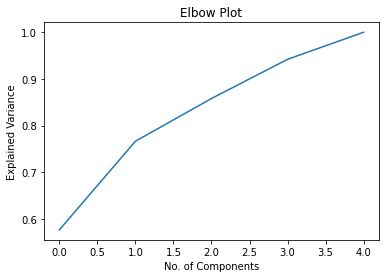

In [23]:
# The elbow plot of the explained variance

plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Plot')
plt.show()

In [24]:
#checking the distribution of cakeweek colulm
# if we check the results we have 0's count 18245 and 1's count 6
# which we can perdict model on such kind of distribution so checking for another column
# which suits to test the accuracy of the model
df_categorical['#cakeweek'].value_counts()

0.0    18245
1.0        6
Name: #cakeweek, dtype: int64

In [25]:
#checking the distribution of bon appetit colulm
#bon appetit column has good amount of distribution of 0's and 1's which can test accuracy of the model
df_categorical['bon appétit'].value_counts()

0.0    9597
1.0    8654
Name: bon appétit, dtype: int64

In [26]:
# Split the data set and perform logistic regression
from sklearn.model_selection import train_test_split

# Try the scaled data set as well as the PCA-trasformed data sets  x_pca2
#logistic reg with bon appetite as  it is balanced compared to cakeweek which has 0 for all rows
X = scaled_data2
Y = df_categorical['bon appétit']

# Split the dataset (569 instances) into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)


# Perform logistic regression 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

# labels are: 0 and 1.
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
print(pd.DataFrame(cm, index=labels, columns=labels))
print ('Accuracy:', accuracy_score(Y_test, Y_pred))

#Total cases (18251, 5)
#Training and testing cases (12775, 5) (5476, 5)
Confusion matrix:
      0     1
0  1970   847
1  1573  1086
Accuracy: 0.5580715850986121


In [27]:
# Adding the new attribute healthy as ratio of protein to calories 
# higher the percentage indicated recipe is more healthy
#   check how well that is correlated with respect to rating
#The correlation is almost 0
scaled_data2['healthy'] = (scaled_data2['protein']/scaled_data2['calories'])
scaled_data2['healthy'].corr(scaled_data2['rating'])

-0.00456985152299105

In [28]:
# Split the data set and perform logistic regression
from sklearn.model_selection import train_test_split

# Try the scaled data set as well as the PCA-trasformed data sets  x_pca2
#logistic reg with bon appetite as  is balanced
X = scaled_data2
Y = df_categorical['bon appétit']

# Split the dataset (569 instances) into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)


# Perform logistic regression 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

# labels are: 1 vs. 0
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
print (pd.DataFrame(cm, index=labels, columns=labels))
print ('Accuracy:', accuracy_score(Y_test, Y_pred))
# New variable didn't improve accuracy

#Total cases (18251, 6)
#Training and testing cases (12775, 6) (5476, 6)
Confusion matrix:
      0     1
0  1970   847
1  1574  1085
Accuracy: 0.5578889700511322


**Summary**
In this project  we have examined Epicurious dataset that contains 20000 receipes. 
 Datapreparation 
  1) Dropped duplicates
  2) Filled the missing variable with Median
  3) Identified the skewed distributions and transformed with cube transformation
  4) Standardizied the data and performed PCA and got the variables that contribute more to variance. All five variables are required to explain 95% variance
As Cakeweek variable is unbalance with high 0's I have used Bon appetit for logistic regression and got accuracy of 0.55

Build new varible healthy that is ratio of proteins to calories  and found the correlation as -0.004.Performed logistic regression with rating and got accuracy of 0.55

